# Getting to know the data

This tutorial uses the [Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/).

Data were collected and made available by [Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) and the [Palmer Station, Antarctica LTER](https://pallter.marine.rutgers.edu/), a member of the [Long Term Ecological Research Network](https://lternet.edu/).

Let's dive into some quick exploration of the data!

In [1]:
import pandas as pd

In [2]:
penguins_raw = pd.read_csv("../data/penguins.csv")
penguins_raw.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,2007-11-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


This looks like a lot. Let's reduce this to some numerical columns and the species as our target column.

In [3]:
num_features = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)"]
cat_features = ["Sex"]
features = num_features + cat_features
target = ["Species"]
penguins = penguins_raw[features+target]
penguins

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Species
0,39.1,18.7,181.0,MALE,Adelie Penguin (Pygoscelis adeliae)
1,39.5,17.4,186.0,FEMALE,Adelie Penguin (Pygoscelis adeliae)
2,40.3,18.0,195.0,FEMALE,Adelie Penguin (Pygoscelis adeliae)
3,NaN,NaN,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
4,36.7,19.3,193.0,FEMALE,Adelie Penguin (Pygoscelis adeliae)
...,...,...,...,...,...
339,55.8,19.8,207.0,MALE,Chinstrap penguin (Pygoscelis antarctica)
340,43.5,18.1,202.0,FEMALE,Chinstrap penguin (Pygoscelis antarctica)
341,49.6,18.2,193.0,MALE,Chinstrap penguin (Pygoscelis antarctica)
342,50.8,19.0,210.0,MALE,Chinstrap penguin (Pygoscelis antarctica)


## Data Visualization

That's much better. So now we can look at the data in detail.

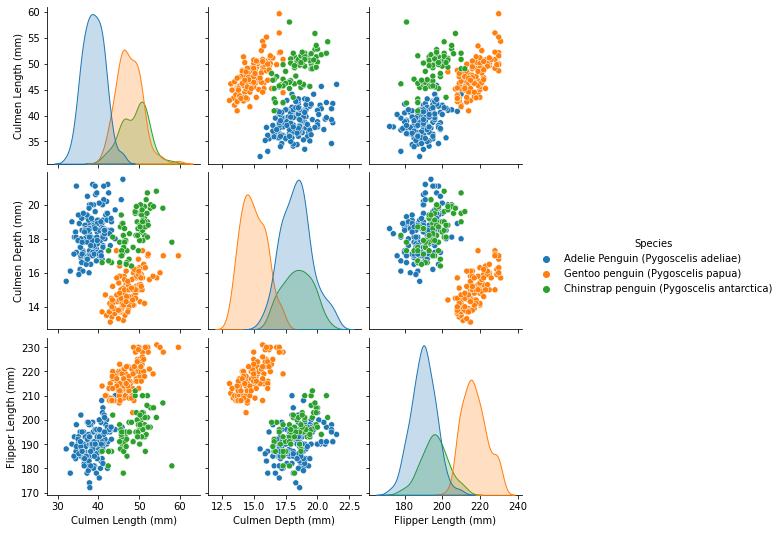

In [4]:
import seaborn as sns

pairplot_figure = sns.pairplot(penguins, hue="Species")

## Data cleaning

Looks like we're getting some good separation of the clusters. 

So that means we can probably do some cleaning and get ready to build some good machine learning models.

In [5]:
penguins = penguins.dropna(axis='rows')
penguins

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Species
0,39.1,18.7,181.0,MALE,Adelie Penguin (Pygoscelis adeliae)
1,39.5,17.4,186.0,FEMALE,Adelie Penguin (Pygoscelis adeliae)
2,40.3,18.0,195.0,FEMALE,Adelie Penguin (Pygoscelis adeliae)
4,36.7,19.3,193.0,FEMALE,Adelie Penguin (Pygoscelis adeliae)
5,39.3,20.6,190.0,MALE,Adelie Penguin (Pygoscelis adeliae)
...,...,...,...,...,...
339,55.8,19.8,207.0,MALE,Chinstrap penguin (Pygoscelis antarctica)
340,43.5,18.1,202.0,FEMALE,Chinstrap penguin (Pygoscelis antarctica)
341,49.6,18.2,193.0,MALE,Chinstrap penguin (Pygoscelis antarctica)
342,50.8,19.0,210.0,MALE,Chinstrap penguin (Pygoscelis antarctica)


In [6]:
penguins.to_csv('../data/penguins_clean.csv', index=False)

Not too bad it looks like we lost two rows. That's manageable, it's a toy dataset after all.

So let's build a small model to classify penuins!
## Machine Learning

First we need to split the data.

This way we can test whether our model learned general rules about our data, or if it just memorized the training data.
When a model does not learn the generalities, this is known as overfitting.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(penguins[features], penguins[target], train_size=.7)
X_train

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex
184,45.1,14.5,207.0,FEMALE
101,41.0,20.0,203.0,MALE
201,45.2,15.8,215.0,MALE
336,51.9,19.5,206.0,MALE
117,37.3,20.5,199.0,MALE
...,...,...,...,...
52,35.0,17.9,190.0,FEMALE
292,50.3,20.0,197.0,MALE
305,52.8,20.0,205.0,MALE
42,36.0,18.5,186.0,FEMALE


In [8]:
y_train

,Species
184,Gentoo penguin (Pygoscelis papua)
101,Adelie Penguin (Pygoscelis adeliae)
201,Gentoo penguin (Pygoscelis papua)
336,Chinstrap penguin (Pygoscelis antarctica)
117,Adelie Penguin (Pygoscelis adeliae)
...,...
52,Adelie Penguin (Pygoscelis adeliae)
292,Chinstrap penguin (Pygoscelis antarctica)
305,Chinstrap penguin (Pygoscelis antarctica)
42,Adelie Penguin (Pygoscelis adeliae)


Now we can build a machine learning model.

Here we'll use the scikit-learn pipeline model. 
This makes it really easy for us to train prepocessors and models on the training data alone and cleanly apply to the test data set without leakage.

### Pre-processing
<div class="alert alert-block alert-info">
<b>Tip:</b> In science, any type of feature selection, scaling, basically anything you do to the data, needs to be done <strong>after</strong> a split into training and test set.<br>Statistically and scientifically valid results come from proper treatment of our data. Unfortunately, we can overfit manually if we don't split out a test set before pre-processing.</div>

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

The `ColumnTransformer` is a neat tool that can apply your preprocessing steps to the right columns in your dataset. 

In fact, you could also use a Pipeline instead of "just" a `StandardScaler` to use more sophisticated and complex preprocessing workflows that go beyond this toy project.

In [19]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC()),
])
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Culmen Length (mm)',
                                                   'Culmen Depth (mm)',
                                                   'Flipper Length (mm)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex'])])),
                ('classifier', SVC())])

We can see a nice model representation here.

You can click on the different modules that will tell you which arguments were passed into the pipeline. In our case, how we handle unknown values in the OneHotEncoder.

### Model Training
Now it's time to fit our Support-Vector Machine to our training data.

In [21]:
model.fit(X_train, y_train[target[0]])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Culmen Length (mm)',
                                                   'Culmen Depth (mm)',
                                                   'Flipper Length (mm)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex'])])),
                ('classifier', SVC())])

We can see that we get a decent score on the training data.

This metric only tells us how well the model can perform on the data it has seen, we don't know anything about generalization and actual "learning" yet.

In [22]:
model.score(X_train, y_train)

0.9957081545064378

To evaluate how well our model learned, we check the model against the test data one final time.
<div class="alert alert-block alert-info">
<b>Tip:</b> It is possible to manually overfit a model to the test set, by tweaking the pipelines based on the test score.<br>This invalidates scientific results and must be avoided. Only evaluate on the test set once!</div>

In [23]:
model.score(X_test, y_test)

1.0